In [6]:
import numpy as np
import cv2
import sys
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

# 3.1

In [1]:
# F(mm) = F(pixels) * SensorWidth(mm) / ImageWidth (pixel).

def focal_length(f_p, sensor_width, image_width ):
    f_l = f_p * (sensor_width / image_width)
    print(f_l)
    return f_l

focal_length(5806.559, 22.2, 3088)



41.744044624352334


41.744044624352334

# 3.2

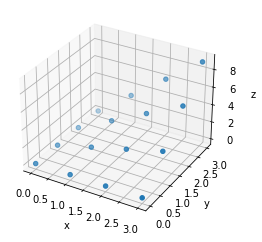

In [42]:
import numpy as np
import cv2
import sys
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt

def change(objects):
    pass


#
def getDisparityMap(imL, imR, numDisparities, blockSize):
    stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

    disparity = stereo.compute(imL, imR)
    disparity = disparity - disparity.min() + 1 # Add 1 so we don't get a zero depth, later
    disparity = disparity.astype(np.float32) / 16.0 # Map is fixed point int with 4 fractional bits

    return disparity # floating point image
# ================================================

# ================================================
#
def plot(disparity):
    # This just plots some sample points.  Change this function to
    # plot the 3D reconstruction from the disparity map and other values
    x = []
    y = []
    z = []
    for r in range(4):
        for c in range(4):
                x += [c]
                y += [r]
                z += [r*c]

    # Plt depths
    ax = plt.axes(projection ='3d')
    ax.scatter(x, y, z, 'green')

    # Labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    plt.savefig('myplot.pdf', bbox_inches='tight') # Can also specify an image, e.g. myplot.png
    plt.show()


# ================================================
#
if __name__ == '__main__':

    # Load left image
    filename = 'umbrellaL.png'
    imgL = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    imgL = cv2.Canny(imgL, 50, 150)
    #
    if imgL is None:
        print('\nError: failed to open {}.\n'.format(filename))
        sys.exit()


    # Load right image
    filename = 'umbrellaR.png'
    imgR = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    imgR = cv2.Canny(imgR, 50, 150)
    #
    if imgR is None:
        print('\nError: failed to open {}.\n'.format(filename))
        sys.exit()


    # Create a window to display the image in
    cv2.namedWindow('Disparity', cv2.WINDOW_NORMAL)

    # # Get disparity map
    disparity = getDisparityMap(imgL, imgR, 16, 5)
    #
    # # Normalise for display
    disparityImg = np.interp(disparity, (disparity.min(), disparity.max()), (0.0, 1.0))

    # Show result
    cv2.imshow('Disparity', disparityImg)
    cv2.createTrackbar('numberDisparity', 'Disparity', 16, 512, change)
    cv2.createTrackbar('blockSize', 'Disparity', 5, 255, change)

    # Show 3D plot of the scene
    plot(disparity)

    # Wait for spacebar press or escape before closing,
    # otherwise window will close without you seeing it
    while True:
        cv2.imshow('Disparity', disparityImg)
        key = cv2.waitKey(1)
        if key == ord(' ') or key == 27:
            break
        #Get trackbars
        numd = cv2.getTrackbarPos('numberDisparity', 'Disparity')
        bs = cv2.getTrackbarPos('blockSize', 'Disparity')

        if numd % 16 != 0 or bs % 2 ==0 :
            continue
        else:
            disparity = getDisparityMap(imgL, imgR, numd, bs)
            disparityImg = np.interp(disparity, (disparity.min(), disparity.max()),(0.0,1.0))

    cv2.destroyAllWindows()



In [35]:

max = np.random.rand(14,25)
print(max.shape[0])

14


In [41]:
x = []
y = []
z = []
for c in range(max.shape[1]):
    y.append(c)
for r in range(max.shape[0]):
    x.append(r)
    for c in range(max.shape[1]):
        z.append(max[r,c])

print(x)
print(y)
print(len(z))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
350


In [2]:
for i in range(5):
    if i>3: continue
    print(i)

0
1
2
3


In [3]:
for i in range(5):
    if i>3:
        continue
    else:
        print(i)

0
1
2
3
